# On Analyzing Real World Time Series for Forecasting
Throughtout this notebook, we will do some preliminary investigations on time series datasets that come from real world problems. We'll begin by conducting exploratory data analysis and then begin developing our models.

## What Needs to be Done
- [ ] Map out system structure for performing our computations of interest
- [ ] Flush out a few models of interest so we can make forecast on real world data
- [ ] Develop the abstraction for our `Model` class that most models typically have when forecasting
- [ ] Figure out whether the data we're analyzing is stationary or not. This will be inside of `UnivariateTimeSeries` class.
- [ ] Write support for `ARIMA` class of models.
- [ ] Revisit chapter 2 and add support for other quantities of interest to compute.

In [133]:
import numpy as np
import pandas as pd
import yfinance as yf

from typing import List, Tuple, NewType, Union, Any

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from abc import ABC
from abc import abstractmethod
from dataclasses import dataclass

## Univariate Time Series Handler for Manipulation and Visualization

In [113]:
Number = Union[int, float]
TimeSeriesData = NewType("TimeSeriesData", List[Number])
UnivariateTimeSeriesData = NewType("UnivariateTimeSeriesData", TimeSeriesData)

In [131]:
# TODO: Add support for matching sample frequencies.
class UnivariateTimeSeries:
    def __init__(
        self,
        time_index: Tuple[str, List[Any]],
        series_name: str,
        series_data: UnivariateTimeSeriesData
    ):
        """Build a univariate time series object that stores the data in a dataframe.
        
        Parameters
        ----------
        time_index: `Tuple[str, List]`
            The name of the index of the time series and it's associated data.
        series_name: `str`
            The name of the column corresponding to the univariate time series data
        series_data: `UnivariateTimeSeriesData`
            The univariate time series raw data
        """
        self._assert_equiv_dimensions(series_data, time_index)
        data_payload = [(series_name, series_data)]
        data_payload += [(index_col_name, index_col_value) for index_col_name, index_col_value in [time_index]]
        
        self.data = pd.DataFrame({col_name: col_data for col_name, col_data in data_payload})
        self.data.set_index(time_index[0], inplace=True)
        self.time_col = time_index[0]
        self.value_col = series_name

    def _assert_equiv_dimensions(self, series_data: UnivariateTimeSeriesData, time_index: Tuple[str, List[any]]):
        time_values = time_index[1]
        assert len(series_data) == len(time_values), "Each observation must have a time associated with it"

    def __str__(self):
        return f"UnivariateTimeSeries({self.value_col})"

    def __repr__(self):
        return str(self)

    def plot(self, tick_skip=10):
        # Plot the time series data
        plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
        
        plt.plot(self.data.index, self.data[self.value_col])
        plt.xlabel(self.time_col)
        plt.ylabel(self.value_col)
        print(f"{id(self)}")
        plt.title(f"Plot of {self}")

        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=tick_skip))
        
        # Rotate the x-axis tick labels for better visibility (optional)
        plt.xticks(rotation=45)
                
        # Display the plot
        plt.show()

## Abstract Model Class for Developing Concrete Models for Training and Inference

In [134]:
# Define the abstract base class
@dataclass
class Model(ABC):
    """Abstract implementation of a model. Each specified model inherits from this base class.
    
    Methods decorated with @abstractmethod must be implemented; if not, the interpreter will throw
    an error. Methods not decorated will be shared by all other classes that inherit from Model.
    """
    data: np.array

    @abstractmethod
    def __name__(self):
        pass

class StationaryModel(Model):
    pass

class NonStationaryModel(Model):
    pass

class StationaryGaussianProcess(StationaryModel):
    pass

class NonstationaryGaussianProcess(NonStationaryModel):
    pass

In [135]:
GaussianProcess(np.array([1., 2.]))

GaussianProcess(data=array([1., 2.]))

## Gather Data to Provide to UnivariateTimeSeries Object

In [129]:
# Get air passenger data and build our UTS
data_df = pd.read_csv("./data/air_passengers.csv")
time_index = ("month", data_df["Month"])
series_name = "passengers_count"
series_data = data_df["#Passengers"].values

ap = UnivariateTimeSeries(time_index, series_name, series_data)

# Gather stock data and build our UTS
start_date = "1949-01-01"
end_date = "1960-12-31"
stock_ticker = "^GSPC"

stock_df = yf.download(stock_ticker, start=start_date, end=end_date)
time_index = ("Date", stock_df.index)
series_name = "snp500"
series_data = stock_df["Open"].values

snp500 = UnivariateTimeSeries(time_index, series_name, series_data)

[*********************100%***********************]  1 of 1 completed


6074518496


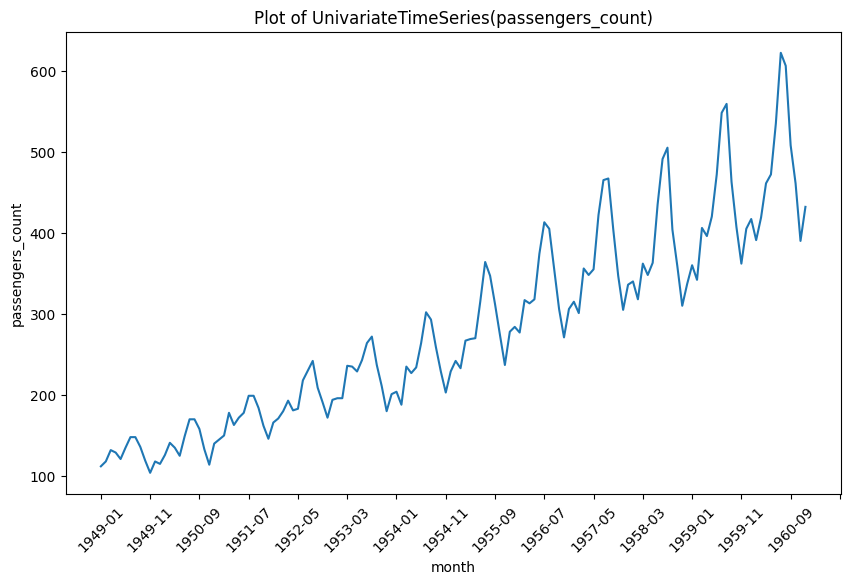

6251617712


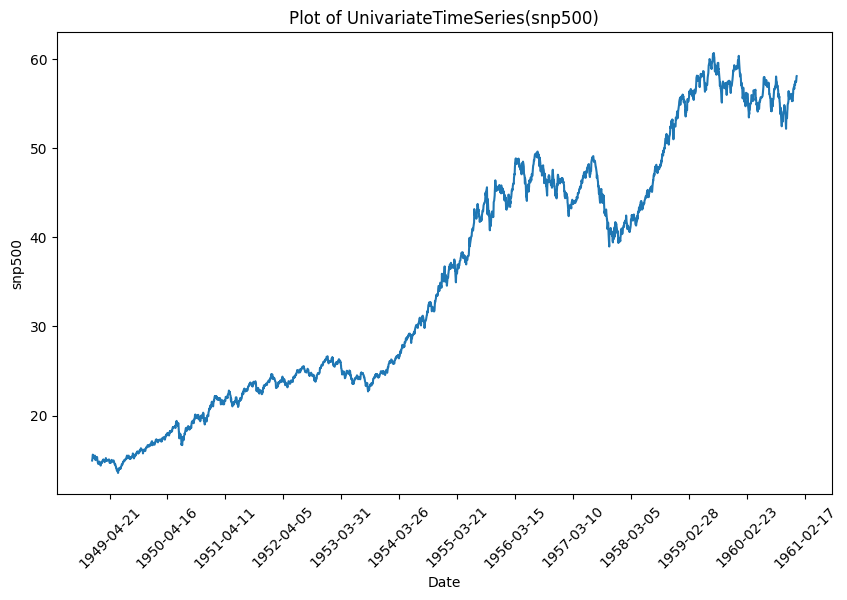

In [130]:
ap.plot()
snp500.plot(tick_skip=360)